In [10]:
%pip install --quiet phiflow
from phi.torch.flow import *
from phi.flow import *  # If JAX is not installed. You can use phi.torch or phi.tf as well.
from tqdm.notebook import trange
import matplotlib.pyplot as plt


In [28]:
@jit_compile
def reaction_diffusion(u, v, du, dv, f, k, dt):
    uvv = u * v**2
    su = du * field.laplace(u) - uvv + f * (1 - u)
    sv = dv * field.laplace(v) + uvv - (f + k) * v
    return u + dt * su, v + dt * sv

/tmp/ipython-input-1868136217.py:4: DeprecationWarning: phiml.math.length is deprecated in favor of phiml.math.norm
  CenteredGrid(lambda x: math.cos(math.vec_length(x-70)/3), x=100, y=100) * .5,
/usr/local/lib/python3.11/dist-packages/phi/vis/_matplotlib/_matplotlib_plots.py:167: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()  # because subplot titles can be added after figure creation


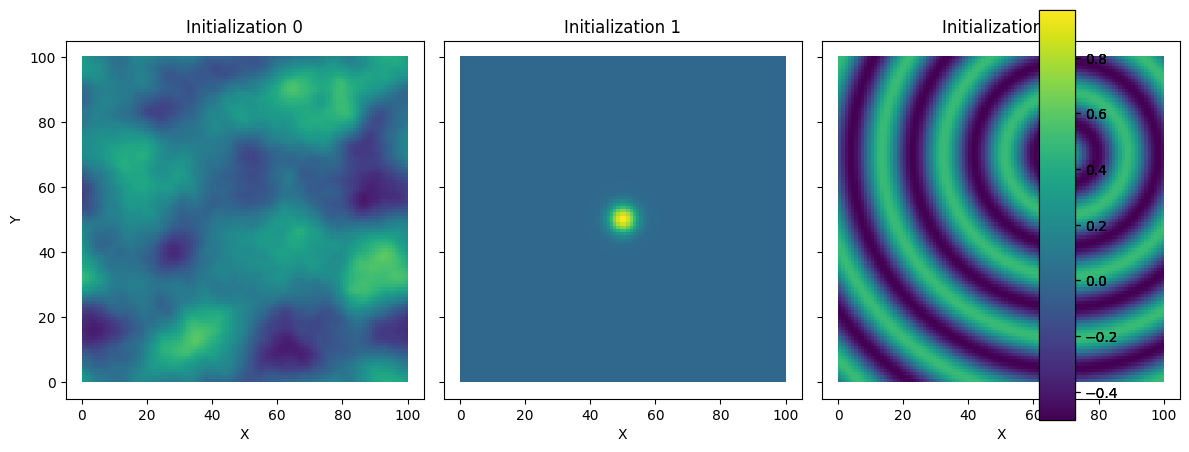

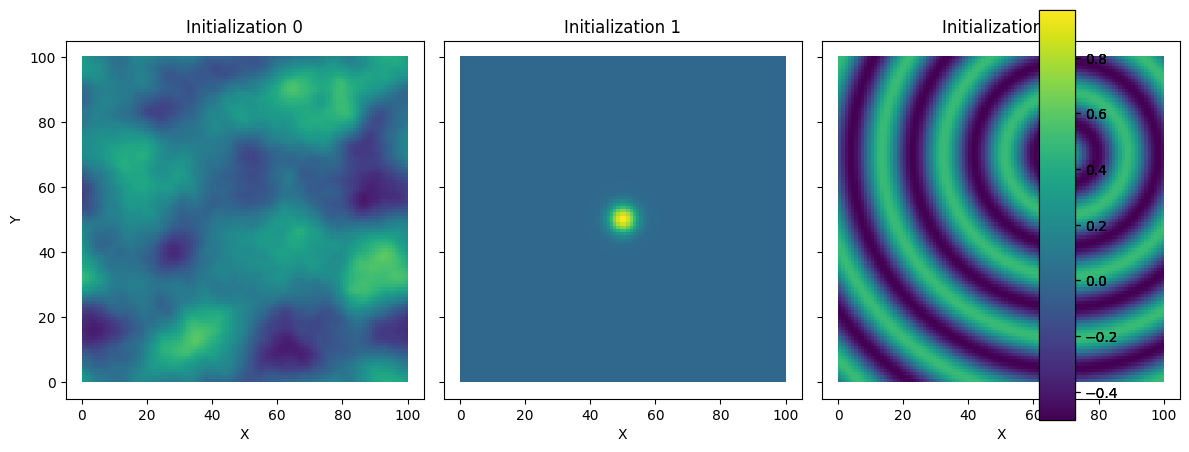

In [39]:
u0 = [
    CenteredGrid(Noise(scale=20, smoothness=1.3), x=100, y=100) * .2 + .1,
    CenteredGrid(lambda x: math.exp(-0.5 * math.sum((x - 50)**2) / 3**2), x=100, y=100),
    CenteredGrid(lambda x: math.cos(math.vec_length(x-70)/3), x=100, y=100) * .5,
]
u0 = stack(u0, batch('initialization'))

plot(u0)

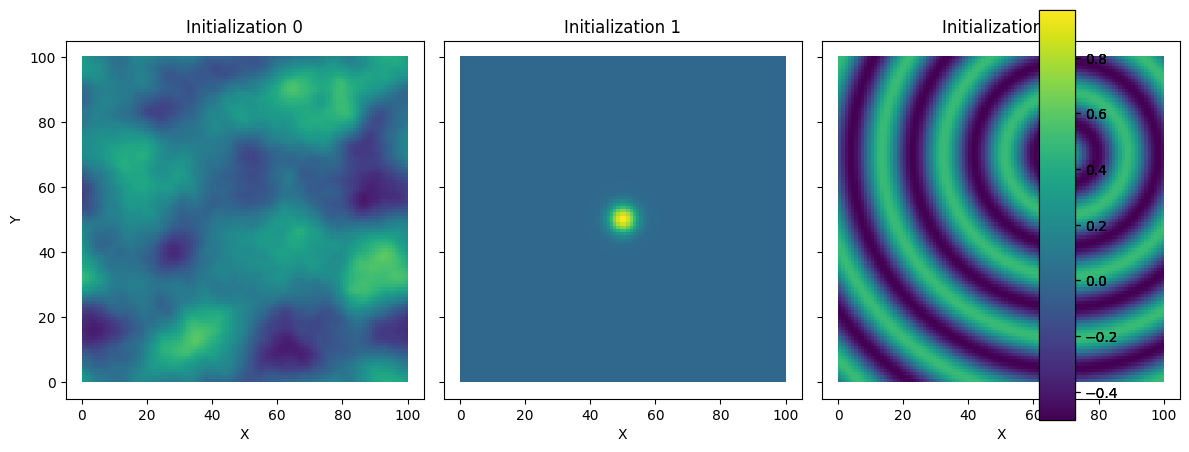

In [40]:
maze = {'du': 0.19, 'dv': 0.05, 'f': 0.06, 'k': 0.062}
u_trj, v_trj = iterate(reaction_diffusion, batch(time=100), u0, u0, dt=.5, f_kwargs=maze, substeps=20, range=trange)
plot(u_trj, animate='time')

  0%|          | 0/100 [00:00<?, ?it/s]

<Figure size 640x480 with 0 Axes>